In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import cv2    
from tqdm import tqdm
import random as random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization
from keras.models import Sequential
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


Using TensorFlow backend.


In [0]:
imagedetails = []
imagelabels = []
IMG_SIZE=150
daisy_dir='/content/drive/My Drive/flowers/daisy'
sunflower_dir='/content/drive/My Drive/flowers/sunflower'
tulip_dir='/content/drive/My Drive/flowers/tulip'
dandelion_dir='/content/drive/My Drive/flowers/dandelion'
rose_dir='/content/drive/My Drive/flowers/rose'

In [4]:
def read_image(label,DIR):
    
    for img in tqdm(os.listdir(DIR)):
    #for img in DIR:
        path = os.path.join(DIR,img)
        #checking image type
        _, ftype = os.path.splitext(path)
        if ftype == ".jpg":
       
            image = cv2.imread(path,cv2.IMREAD_COLOR)
            image = cv2.resize(image, (IMG_SIZE,IMG_SIZE),interpolation = cv2.INTER_AREA)
            imagedetails.append(np.array(image))
            imagelabels.append(str(label))

read_image("Daisy",daisy_dir)
read_image("Sunflower",sunflower_dir)
read_image("Tulip",tulip_dir)
read_image("Dandelion",dandelion_dir)
read_image("Rose",rose_dir)

100%|██████████| 784/784 [02:59<00:00,  4.36it/s]


In [5]:
encoder = LabelEncoder()
#converting the images into arrays which will have its intensity values
X = np.array(imagedetails)
print(X)
#divide by 255 is to make the analysis easy because each color 8 plains (2^8==256)
X = X/255
print(X)
print(imagelabels)
#transformig the image labels into integers because it easy to deal with integers compared to strings;
y = encoder.fit_transform(imagelabels)
#dividing into 5 categories
y = to_categorical(y,5)
print(y)
#np.delete(X,1)
#np.delete(X,2)
print(X.shape)
print(y.shape)

[[[[117 129 133]
   [111 124 124]
   [103 112 114]
   ...
   [144 167 164]
   [142 168 164]
   [129 155 144]]

  [[116 125 127]
   [101 110 109]
   [ 92  95  99]
   ...
   [130 146 143]
   [134 152 148]
   [122 141 131]]

  [[106 110 110]
   [ 95  96  97]
   [ 85  77  86]
   ...
   [115 131 125]
   [115 131 126]
   [114 130 120]]

  ...

  [[ 41  12  28]
   [ 41  12  28]
   [ 40  11  27]
   ...
   [ 83  24  49]
   [ 82  21  49]
   [ 85  22  51]]

  [[ 40  11  27]
   [ 39  10  26]
   [ 40  11  27]
   ...
   [ 83  23  51]
   [ 86  25  53]
   [ 87  25  53]]

  [[ 38   9  24]
   [ 37   8  23]
   [ 40  11  26]
   ...
   [ 83  23  52]
   [ 85  24  52]
   [ 84  22  49]]]


 [[[223 216 212]
   [221 214 210]
   [225 216 214]
   ...
   [ 17  12  12]
   [ 15  10  10]
   [ 13   8   8]]

  [[227 220 218]
   [230 222 220]
   [225 218 215]
   ...
   [ 15  12  13]
   [ 13   8   9]
   [ 12   7   7]]

  [[235 226 226]
   [232 224 221]
   [230 225 222]
   ...
   [ 15  13  13]
   [ 15  10  11]
   [ 13   8

In [6]:
#dividing the entire dataset into training data and validation data
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=42)
#dividing the training dataset into training and testing
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size=0.2,random_state=42)
X_train.shape,y_train.shape,X_valid.shape,y_valid.shape,X_test.shape,y_test.shape
# sum should result in total(4333)

((2772, 150, 150, 3),
 (2772, 5),
 (867, 150, 150, 3),
 (867, 5),
 (694, 150, 150, 3),
 (694, 5))

In [0]:
batch_size = 64
# as we increase the number of epochs the accuracy will increase
epochs = 30
num_classes = y.shape[1]

In [0]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',padding='same',input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPool2D((2, 2),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(128,kernel_size= (3, 3), activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2, 2),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2, 2),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2, 2),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2, 2),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(num_classes, activation='softmax'))


In [24]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 150, 150, 64)      1792      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 75, 75, 64)        0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 75, 75, 64)        256       
_________________________________________________________________
dropout_16 (Dropout)         (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 75, 75, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 38, 38, 128)       0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 38, 38, 128)      

In [0]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])

In [0]:
imagegen = ImageDataGenerator(featurewise_center=False,
                             samplewise_center=False,
                             featurewise_std_normalization=False,
                             samplewise_std_normalization=False,
                            rotation_range=60,
                              zoom_range=0.1,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              fill_mode='reflect')
imagegen.fit(X_train)

In [12]:
model_dropout = model.fit_generator(imagegen.flow(X_train,y_train, batch_size=batch_size),epochs=epochs,verbose=1,
                          validation_data=(X_valid, y_valid),steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/30
43/43 [==============================] - 219s 5s/step - loss: 1.7266 - accuracy: 0.4387 - val_loss: 2.5398 - val_accuracy: 0.2226
Epoch 2/30
43/43 [==============================] - 216s 5s/step - loss: 1.2158 - accuracy: 0.5547 - val_loss: 3.3432 - val_accuracy: 0.2226
Epoch 3/30
43/43 [==============================] - 216s 5s/step - loss: 1.0975 - accuracy: 0.5827 - val_loss: 2.4961 - val_accuracy: 0.2226
Epoch 4/30
43/43 [==============================] - 216s 5s/step - loss: 1.0700 - accuracy: 0.6008 - val_loss: 3.4279 - val_accuracy: 0.2272
Epoch 5/30
43/43 [==============================] - 216s 5s/step - loss: 1.0166 - accuracy: 0.6086 - val_loss: 2.1884 - val_accuracy: 0.2572
Epoch 6/30
43/43 [==============================] - 216s 5s/step - loss: 0.9449 - accuracy: 0.6448 - val_loss: 2.3437 - val_accuracy: 0.2226
Epoch 7/30
43/43 [==============================] - 220s 5s/step - loss: 0.8975 - accuracy: 0.6635 - val_loss: 3.8038 - val_accuracy: 0.2226
Epoch 8/30
43

In [13]:
test_eval = model.evaluate(X_test, y_test, verbose=1)

694/694 [==============================] - 13s 19ms/step


In [0]:
#for the train set X we are calculating the output y using the model defined above 
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1).astype(int)
# converting both the values to int will help us to compare easily
y_true = np.argmax(y_test,axis = 1).astype(int)

In [15]:
corr=[]
incorr=[]
corr_count=0
incorr_count=0

for i in range(len(y_test)):
   # checking for correct predictions
    if(y_pred[i]==y_true[i]):
        corr.append(i)
        corr_count+=1
    else:
        incorr.append(i)
        incorr_count+=1
        
print("%d flowers are identified correctly" %(corr_count))
print("%d flowers are identified incorrectly" %(incorr_count))

486 flowers are identified correctly
208 flowers are identified incorrectly


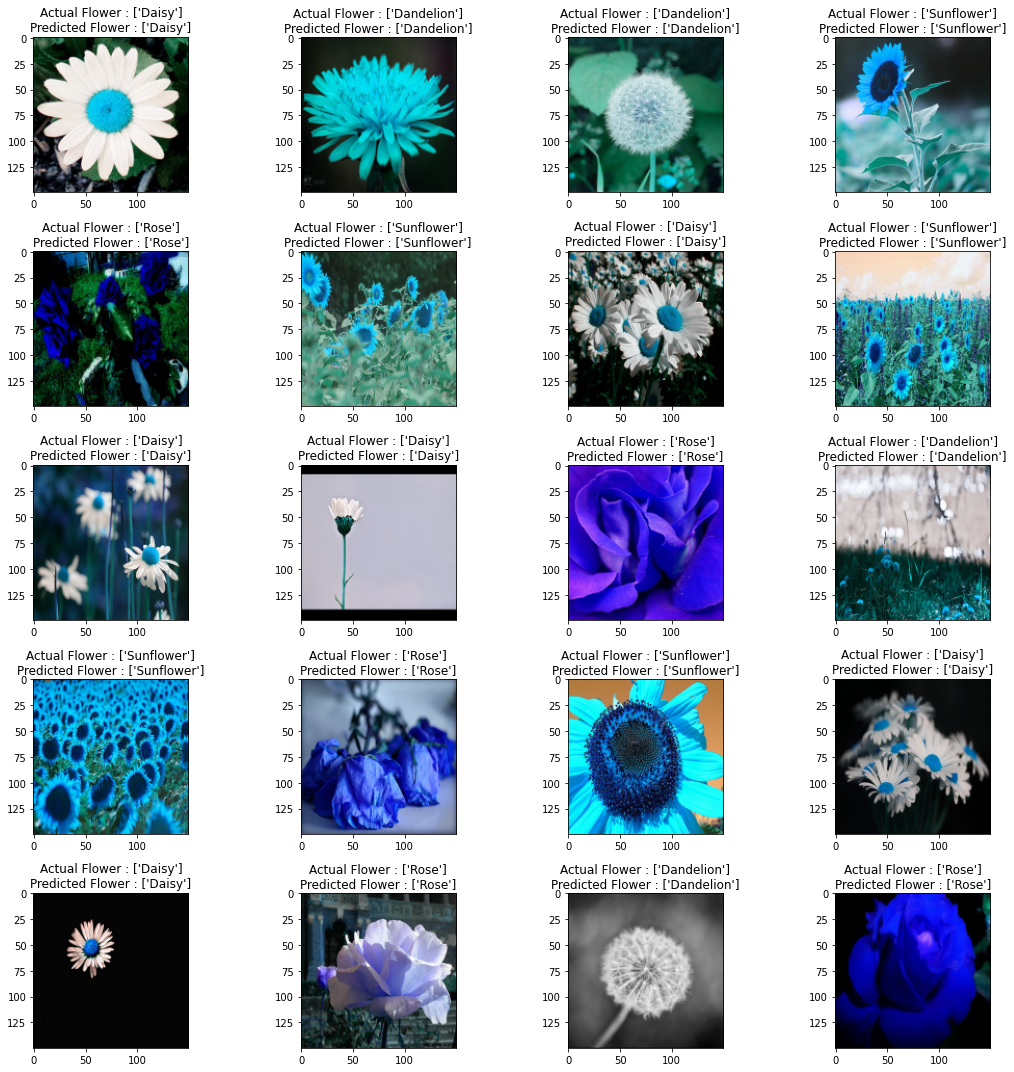

In [16]:
fig,ax = plt.subplots(num_classes,4)
fig.set_size_inches(15,15)
# printing some correctly found flowers
count = 0
for i in range (num_classes):
   for j in range (4):
        
        ax[i,j].imshow(X_test[corr[count]])
        #inverse_transform is done because we use encoder to change String to int
        ax[i,j].set_title("Actual Flower : "+str(encoder.inverse_transform([y_true[corr[count]]])) +  "\n" + "Predicted Flower : "+str(encoder.inverse_transform([y_pred[corr[count]]])))
        
        count+=1
        
plt.tight_layout()

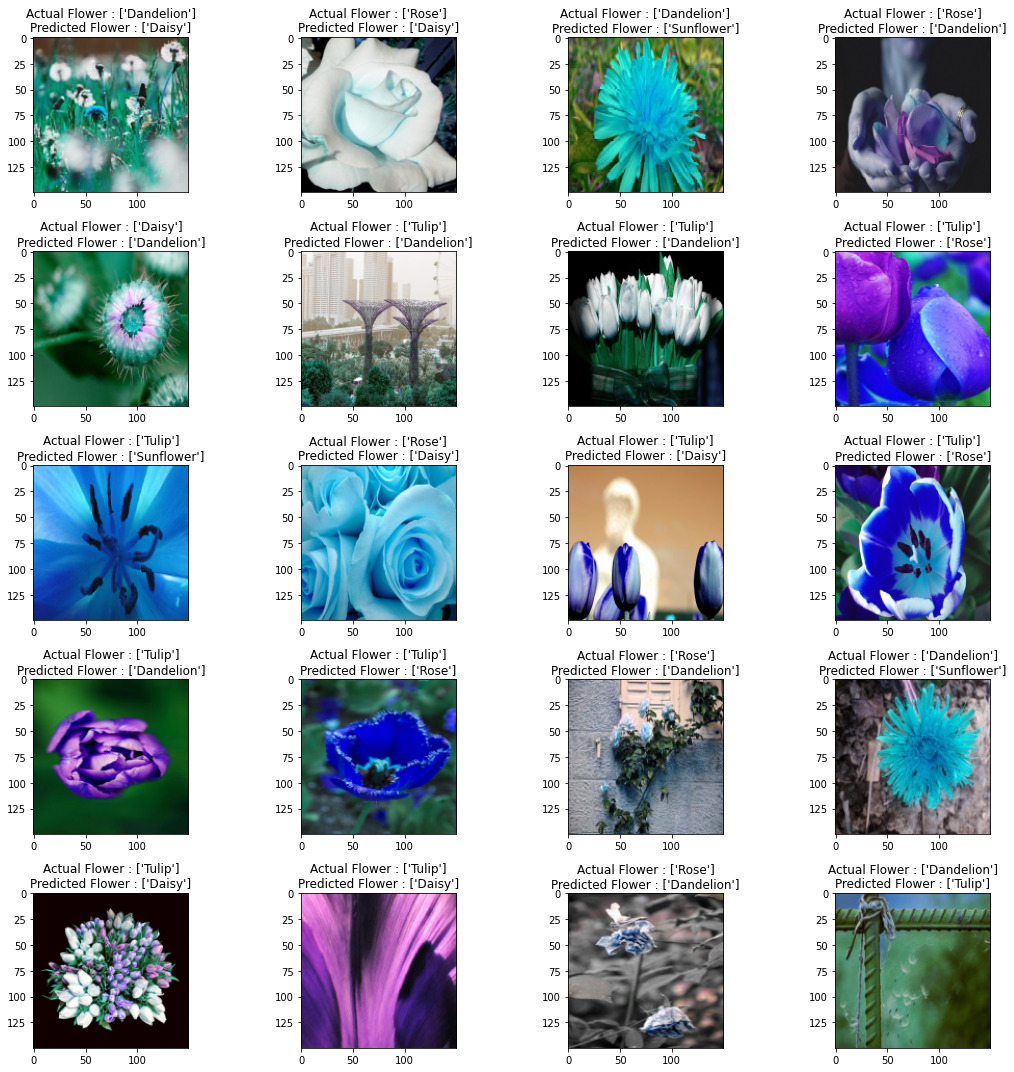

In [17]:
fig,ax = plt.subplots(num_classes,4)
fig.set_size_inches(15,15)
#printing some wrongly found flowers
count = 0
for i in range (num_classes):
    for j in range (4):
        ax[i,j].imshow(X_test[incorr[count]])        
        ax[i,j].set_title("Actual Flower : "+str(encoder.inverse_transform([y_true[incorr[count]]])) +  "\n" + "Predicted Flower : "+str(encoder.inverse_transform([y_pred[incorr[count]]])))

        count+=1
        
plt.tight_layout()